In [1]:
from spectacle.core.spectra import Spectrum1D
from spectacle.modeling.models import Absorption1D
from spectacle.process.lsf import COSLSF
from spectacle.core.lines import Line
import matplotlib.pyplot as plt
import numpy as np

INFO:root:Added misty to custom loaders.
INFO:root:Added my-format to custom loaders.


In [2]:
%matplotlib notebook
# plt.rcParams["figure.figsize"] = [16, 8]

# Generate a spectrum
Create a mock spectrum with an H$\alpha$ ($\lambda = 1215\;\mathrm{Angstom}$) absorption feature with $f = 0.4164$, $b = 100\; \mathrm{km/s}$, and column density $n = 10^{14.66}\;\mathrm{cm^{-2}}$.

In [3]:
# Get a listing available pre-defined lines
from spectacle.core.registries import line_registry
line_registry

<Table length=329>
  name      wave   osc_str     gamma    
          Angstrom                      
  str9    float64  float64    float64   
-------- --------- -------- ------------
  HI1216 1215.6701   0.4164  626500000.0
  HI1026 1025.7223  0.07912  189700000.0
   HI973  972.5368    0.029   81270000.0
   HI950  949.7431  0.01394   42040000.0
   HI938  937.8035 0.007799   24500000.0
   HI931  930.7483 0.004814   12360000.0
   HI926  926.2257 0.003183    8255000.0
   HI923  923.1504 0.002216    5785000.0
   HI921  920.9631 0.001605    4210000.0
     ...       ...      ...          ...
NiII1455  1454.842   0.0323  102000000.0
NiII1393  1393.324   0.0101   34700000.0
NiII1370  1370.131   0.0769  410000000.0
NiII1317  1317.217  0.07786  420500000.0
CuII1368 1367.9509    0.179  623000000.0
CuII1359  1358.773   0.3803  720000000.0
ZnII2063  2062.664    0.256  386000000.0
ZnII2026  2026.136    0.489  407000000.0
GeII1602 1602.4863   0.1436  990600000.0
GaII1414  1414.402      1.8 1970000000

## Create lines

In [4]:
# Create a line by name
line1 = Line(name="NV1239")

# Add line explicitly
line2 = Line(name="SomeLine", lambda_0=1.21567010E+03, f_value=0.4164, v_doppler=2.5e7, column_density=10**14.66, gamma=6.2650000e+08)

## Create absorption model

In [5]:
# Create an absorption model using the lines we defined above
model = Absorption1D(lines=[line1, line2])

## Create spectrum

[<Line(lambda_0=1238.821, f_value=0.157, gamma=339100000.0, v_doppler=10000000.0, column_density=457088189614875.2, delta_v=0.0, delta_lambda=0.0, name='NV1239')>, <Line(lambda_0=1215.6701, f_value=0.4164, gamma=626500000.0, v_doppler=25000000.0, column_density=457088189614875.2, delta_v=0.0, delta_lambda=0.0, name='SomeLine')>]


<IPython.core.display.Javascript object>


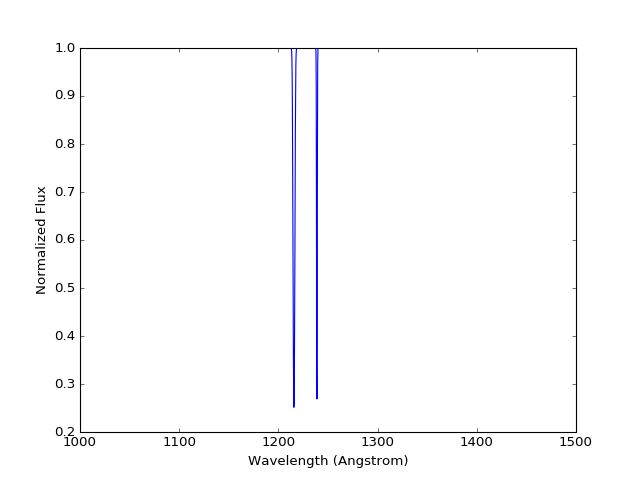

In [6]:
# Define the wavelength range, and then create the spectrum
dispersion = np.linspace(1000, 1500, 2000)
spectrum = model(dispersion)

# The spectrum also contains basic information about where the lines are
print(spectrum.lines)

# Plot the spectrum
f, (ax) = plt.subplots()

ax.plot(spectrum.dispersion, spectrum.data)
ax.set_xlabel("Wavelength (Angstrom)")
ax.set_ylabel("Normalized Flux")

plt.show()

## Apply noise to the spectrum

<IPython.core.display.Javascript object>


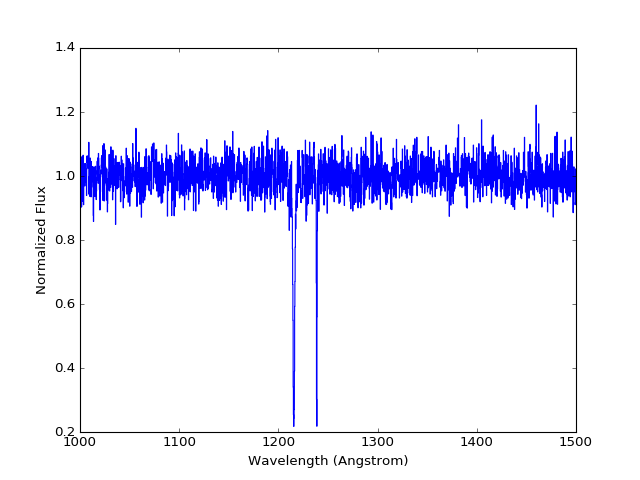

In [7]:
# New spectrum
spectrum = model(dispersion)

# Add noise
spectrum.add_noise(std_dev=0.05)

# Plot resultant spectrum
f, (ax) = plt.subplots()

ax.plot(spectrum.dispersion, spectrum.data, drawstyle='steps')
ax.set_xlabel("Wavelength (Angstrom)")
ax.set_ylabel("Normalized Flux")

## Apply the COS LSF

<IPython.core.display.Javascript object>


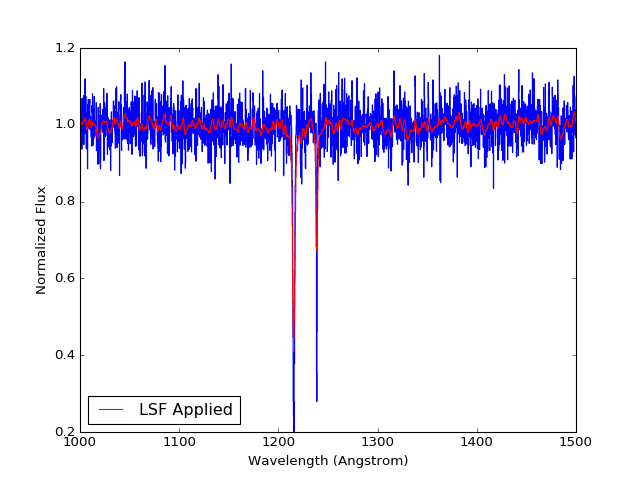

In [8]:
# New spectrum
spectrum = model(dispersion)

# Add noise
spectrum.add_noise(std_dev=0.05)

f, (ax) = plt.subplots()

# Plot the current, un-convolved spectrum
ax.plot(spectrum.dispersion, spectrum.data, drawstyle='steps')

# Create and add the LSF to the spectrum object
cos_lsf = COSLSF()
spectrum.add_lsf(cos_lsf)

# Plot the new, convolved spectrum
ax.plot(spectrum.dispersion, spectrum.data, drawstyle='steps', color='r', label="LSF Applied")
ax.set_xlabel("Wavelength (Angstrom)")
ax.set_ylabel("Normalized Flux")

plt.legend(loc=0)

## Resampling

Provide a dispersion with a lower samping and project the spectrum onto this wavelength grid.

<IPython.core.display.Javascript object>


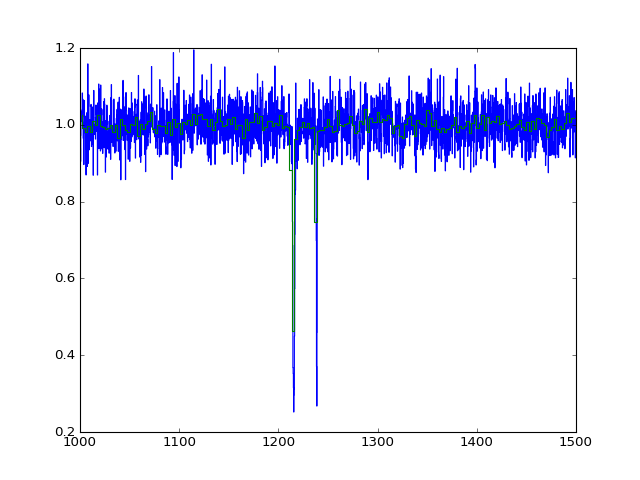

INFO:root:Re-sampling: original and final grids are uniform.


In [9]:
# New spectrum
spectrum = model(dispersion)

# Add noise
spectrum.add_noise(std_dev=0.05)

f, ax = plt.subplots()

ax.step(spectrum.dispersion, spectrum.data)

# Resample to lower grid
new_spectrum = spectrum.resample(dispersion=np.linspace(dispersion[0], dispersion[-1], 200), copy=True)

ax.step(new_spectrum.dispersion[1:-1], new_spectrum.data[1:-1])

# Velocity space

<IPython.core.display.Javascript object>


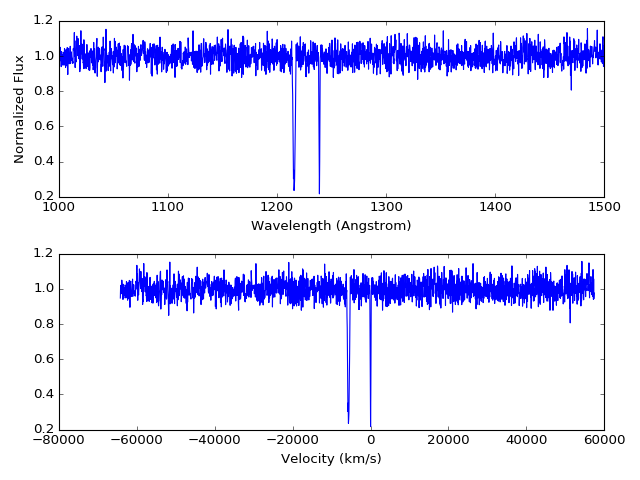

In [10]:
# New spectrum
spectrum = model(dispersion)

# Add noise
spectrum.add_noise(std_dev=0.05)

f, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(spectrum.dispersion, spectrum.data)
ax2.plot(spectrum.velocity(1.23882100E+03), spectrum.data)

ax1.set_ylabel("Normalized Flux")
ax1.set_xlabel("Wavelength (Angstrom)")
ax2.set_xlabel("Velocity (km/s)")

plt.tight_layout()